In [1]:
#!conda install pandas -y 
#!pip install hyperopt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def f(x): 
    return -np.sin(3*x)-x**2-0.7*x

**Goal:** Minimize $f$ using `Hyperopt`. Let's pretend for a moment that $f(x)$ is actually the loss function of machine learning problem with hyperparameter $x$.

In [4]:
x = np.linspace(-1, 1, 1000)
y = f(x)

# Place where the minimum is reached, and the value there.
x_min = x[np.argmin(y)]
y_min = min(y)

In [5]:
print(x_min)
print(y_min)

0.8238238238238238
-1.876443337022946


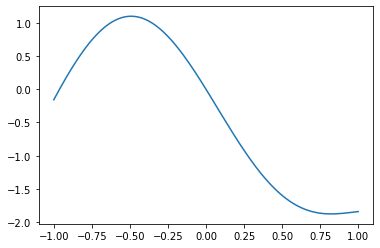

In [6]:
plt.plot(x,y);

### Example: Compare random search for hyperparameter optimization against TPE

In [7]:
from hyperopt import hp

# Create domain space: generator for our space
mesh = hp.uniform('x', -1, 1)

In [8]:
# Create `Trials` object to store simulation history
from hyperopt import Trials

tpe_trials = Trials()
rand_trials = Trials()

# Algorithms to sample from
from hyperopt import rand, tpe # random search and TPE

tpe_algo = tpe.suggest
rand_algo = rand.suggest

#### Simulation time!

In [15]:
# Simulation using TPE
from hyperopt import fmin

# Run evals on TPE
tpe_best = fmin(fn=f, space=mesh, algo=tpe_algo, trials=tpe_trials
                , max_evals=1000, rstate=np.random.RandomState(123)
               )
print(tpe_best)

# Run evals on TPE
rand_best = fmin(fn=f, space=mesh, algo=rand_algo, trials=rand_trials
                , max_evals=1000, rstate=np.random.RandomState(123)
               )
print(tpe_best)

2000trial [00:00, 2077416.54trial/s, best loss=?]
{'x': 0.8227495686621059}
100%|█| 1000/1000 [00:01<00:00, 519.26trial/s
{'x': 0.8227495686621059}


In [16]:
tpe_results = pd.DataFrame({
                            'iteration':tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x'],
                            'loss':[row['loss'] for row in tpe_trials.results]
})

rand_results = pd.DataFrame({
                            'iteration':rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x'],
                            'loss':[row['loss'] for row in rand_trials.results]
})

In [11]:
tpe_results.head()

,iteration,x,loss
0,0,0.456060,-1.506777
1,1,0.717388,-1.852529
2,2,0.985036,-1.845227
3,3,0.346955,-1.226087
4,4,0.125230,-0.470257


Text(0, 0.5, 'Value of x')

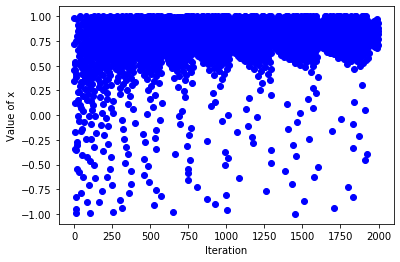

In [18]:
plt.plot(tpe_results['iteration'], tpe_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

Text(0, 0.5, 'Value of x')

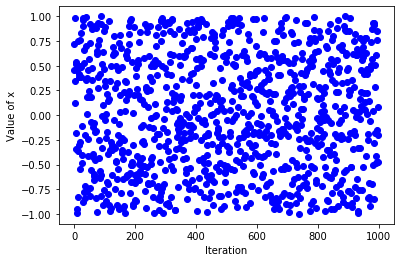

In [17]:
plt.plot(rand_results['iteration'], rand_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

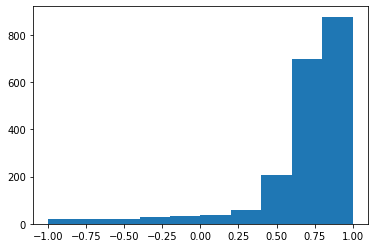

In [14]:
plt.hist(tpe_results['x']);